# Case Study 3 : Analyzing data from MovieLens

**Due Date: Due Date: October 31, 2024 by 5:59pm**


## The MovieLens data sets


http://grouplens.org/datasets/movielens/



In [1]:
from IPython.lib.display import YouTubeVideo

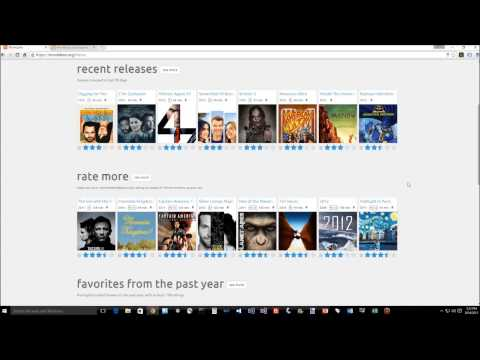

In [2]:
YouTubeVideo('4tW9HY0Q460')

**TEAM Members:** 

Please EDIT this cell and add the names of all the team members in your team:

    1. Gadiputi Madhava Kalyan
    
    2. Kevin Zachariah Peter
    
    3. Aires  Miguens
    
    4. Sylvester Krampah
 
Group Name: Data Alchemists 

**Please note that there will be a survey after the case study, where you will have to answer questions about other group members’ contributions anonymously.**

**Desired outcome of the case study.**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how they rate movies.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* Chapter 2 (only the section on the MovieLens 1M Data Set), Chapter 5, Chapter 6,
and Chapter 8 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (available from the WPI library as an e-book).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!




# Problem 1 (20 points total): 

## (10 points) Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from http://grouplens.org/datasets/movielens/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame
* Store the data into an HDF5 file.

## (10 points) Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!


In [8]:
import pandas as pd

ratings_col = ['UserID', 'MovieID', 'Rating', 'Timestamp']
users_col = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
movies_col = ['MovieID', 'Title', 'Genres']

movies = pd.read_csv(r"C:\Users\ASUS\Downloads\movies.dat", sep='::', engine='python', names=movies_col, encoding='ISO-8859-1')
ratings = pd.read_csv(r"C:\Users\ASUS\Downloads\ratings.dat",sep='::', engine='python', names=ratings_col, encoding='ISO-8859-1' )
users = pd.read_csv(r"C:\Users\ASUS\Downloads\users.dat",sep='::', engine='python', names=users_col, encoding='ISO-8859-1')


ratingsANDmovies = pd.merge(ratings, movies, on='MovieID')
df = pd.merge(ratingsANDmovies, users, on='UserID')

df.sample(10)

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
125780,1676,153,2,974800483,Batman Forever (1995),Action|Adventure|Comedy|Crime,M,18,4,91301
709960,880,1372,4,975263006,Star Trek VI: The Undiscovered Country (1991),Action|Adventure|Sci-Fi,M,35,17,94114
589256,5001,1029,3,1019973609,Dumbo (1941),Animation|Children's|Musical,F,25,2,63119
798639,654,2193,4,975701340,Willow (1988),Action|Adventure|Fantasy,M,50,7,75023
171500,2181,1834,2,974860378,"Spanish Prisoner, The (1997)",Drama|Thriller,M,25,0,45245
792901,263,1883,5,976652239,Bulworth (1998),Comedy,F,25,7,22304
534646,5878,934,3,957548093,Father of the Bride (1950),Comedy,F,25,0,60640
826622,2640,1097,4,973569972,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,M,35,12,78230
361508,4802,2716,5,962940185,Ghostbusters (1984),Comedy|Horror,M,56,1,40601
266670,3618,2617,3,966598718,"Mummy, The (1999)",Action|Adventure|Horror|Thriller,M,56,17,22657


In [10]:
!pip install h5py
import h5py
df.to_hdf("movie_lens_1m.h5", key="df", mode="w")

In [5]:
# How many movies have an average rating over 4.5 overall?
average_ratings = df.groupby('MovieID')['Rating'].mean()
print(f"Movies with average rating > 4.5 overall: {len(average_ratings[average_ratings > 4.5])}")

#How many movies have an average rating over 4.5 among men? How about women?
men= df[df['Gender'] == 'M']
women = df[df['Gender'] == 'F']
avg_men = men.groupby('MovieID')['Rating'].mean()
avg_women = women.groupby('MovieID')['Rating'].mean()
print(f"Movies with average rating > 4.5 among men: {len(avg_men[avg_men > 4.5])}")
print(f"Movies with average rating > 4.5 among women: {len(avg_women[avg_women > 4.5])}")

#How many movies have an median rating over 4.5 among men over age 30? How about women over age 30?
men_over_30 = df[(df['Gender'] == 'M') & (df['Age'] > 30)]
women_over_30 = df[(df['Gender'] == 'F') & (df['Age'] > 30)]
median_men_over_30 = men_over_30.groupby('MovieID')['Rating'].median()
median_women_over_30 = women_over_30.groupby('MovieID')['Rating'].median()
print(f"Movies with median rating > 4.5 among men over 30: {len(median_men_over_30[median_men_over_30 > 4.5])}")
print(f"Movies with median rating > 4.5 among women over 30: {len(median_women_over_30[median_women_over_30 > 4.5])}")

#What are the ten most popular movies
#Among the top 100 movies with the most number of ratings, select top 10 movies with the highest rating while making sure its liked by both men and women.
ratings_per_movie = df.groupby('MovieID')['Rating'].count()
ratings_per_movie.mean()
print(f"The average number of ratings per movie is: {ratings_per_movie.mean()}")
print(f"The number of movies in the dataset is: {df['MovieID'].nunique()}")

top_100_most_rated = df.groupby('MovieID')['Rating'].count().nlargest(100).index
top_100_movies = df[df['MovieID'].isin(top_100_most_rated)]
average_ratings_men = top_100_movies[top_100_movies['Gender'] == 'M'].groupby('MovieID')['Rating'].mean()
average_ratings_women = top_100_movies[top_100_movies['Gender'] == 'F'].groupby('MovieID')['Rating'].mean()
popular_movies_among_both = average_ratings_men[average_ratings_men > 4].index.intersection(
    average_ratings_women[average_ratings_women > 4].index
)

popular_movies = top_100_movies[top_100_movies['MovieID'].isin(popular_movies_among_both)]
average_ratings_popular_movies = popular_movies.groupby('MovieID')['Rating'].mean()

top_10_highest_rated = average_ratings_popular_movies.nlargest(10)

top_10_movies= pd.merge(top_10_highest_rated, movies, on='MovieID')
print(top_10_movies[['MovieID', 'Title', 'Rating']])

Movies with average rating > 4.5 overall: 21
Movies with average rating > 4.5 among men: 23
Movies with average rating > 4.5 among women: 51
Movies with median rating > 4.5 among men over 30: 86
Movies with median rating > 4.5 among women over 30: 149
The average number of ratings per movie is: 269.88909875876953
The number of movies in the dataset is: 3706
   MovieID                                              Title    Rating
0      318                   Shawshank Redemption, The (1994)  4.554558
1      858                              Godfather, The (1972)  4.524966
2       50                         Usual Suspects, The (1995)  4.517106
3      527                            Schindler's List (1993)  4.510417
4     1198                     Raiders of the Lost Ark (1981)  4.477725
5      260          Star Wars: Episode IV - A New Hope (1977)  4.453694
6      750  Dr. Strangelove or: How I Learned to Stop Worr...  4.449890
7      912                                  Casablanca (1942)  4

In [6]:
#Conjecture-1: people between the ages of 1 and 10 are the easiest to please since they are all young children
bins = [0, 18, 25, 35, 45, 50, 56, float('inf')]  # Using float('inf') for 56+
labels = ['Under 18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
print(df.groupby('AgeGroup')['Rating'].mean())
#Conjecture is false as age doesnt seem to have a huge impact, with all age groups being fairly critical with their ratings, with people above 56 being the most linenet.
#As per the description provided in the dataset, there is no way to just select children under 10 as an age of '0' means under 18 in this data set.

AgeGroup
Under 18    3.549520
18-24       3.507573
25-34       3.545235
35-44       3.618162
45-49       3.638062
50-55       3.714512
56+         3.766632
Name: Rating, dtype: float64


C:\Users\gmkal\AppData\Local\Temp\ipykernel_43324\3950906439.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('AgeGroup')['Rating'].mean())


In [7]:
unique_genres = set()

for genres in df['Genres']:
    unique_genres.update(genres.split('|'))

print(unique_genres)

{'Fantasy', 'Thriller', 'Documentary', 'Sci-Fi', 'Drama', 'Romance', 'Musical', 'Western', 'Film-Noir', 'Comedy', 'Action', 'War', "Children's", 'Mystery', 'Adventure', 'Animation', 'Crime', 'Horror'}


In [8]:
# Conjecture-2: Women like Romance, Musicals, and Comedy the most
women_ratings = df[df['Gender'] == 'F'].copy()
genres_dummies = women_ratings['Genres'].str.get_dummies(sep='|')
genre_ratings_sum = (genres_dummies.T * women_ratings['Rating'].values).sum(axis=1)
genre_ratings_count = genres_dummies.sum(axis=0)
avg_genre_ratings_women = genre_ratings_sum / genre_ratings_count
avg_genre_ratings_women.nlargest(3)
#Our conjecture is false as women like film-noir, documentary and war the most

Film-Noir      4.018087
Documentary    3.946392
War            3.893138
dtype: float64

In [9]:
# Conjecture-3: Men under 24 like Action, Sci-fi, and Adventure the most
men_under_24 = df[(df['Gender'] == 'M') & (df['Age'] < 24)].copy()
genres_dummies = men_under_24['Genres'].str.get_dummies(sep='|')
genre_ratings_sum = (genres_dummies.T * men_under_24['Rating'].values).sum(axis=1)
genre_ratings_count = genres_dummies.sum(axis=0)
avg_genre_ratings_men_under_24 = genre_ratings_sum / genre_ratings_count
avg_genre_ratings_men_under_24.nlargest(3)

#Conjecture is false

Film-Noir      4.055447
War            3.887989
Documentary    3.840168
dtype: float64

In [10]:
# Conjecture-4: Fantasy, Mystery, and Thriller are equally liked by both men and women
men_ratings = df[df['Gender'] == 'M'].copy()
women_ratings = df[df['Gender'] == 'F'].copy()
genres_dummies_men = men_ratings['Genres'].str.get_dummies(sep='|')
genres_dummies_women = women_ratings['Genres'].str.get_dummies(sep='|')
avg_genre_ratings_men = (genres_dummies_men.T * men_ratings['Rating'].values).sum(axis=1) / genres_dummies_men.sum(axis=0)
avg_genre_ratings_women = (genres_dummies_women.T * women_ratings['Rating'].values).sum(axis=1) / genres_dummies_women.sum(axis=0)
shared_genres = ['Fantasy', 'Mystery', 'Thriller']
avg_genre_ratings_men[shared_genres]


Fantasy     3.426603
Mystery     3.662009
Thriller    3.569685
dtype: float64

In [11]:
avg_genre_ratings_women[shared_genres]

Fantasy     3.513076
Mystery     3.686548
Thriller    3.573360
dtype: float64

In [12]:
#While men and women are on the same page when it comes to mystery and thriller, women like fantasy a bit more than men

In [13]:
# Conjecture-5: Men over 34 like War, Film-noir, and Documentary the most
men_over_34 = df[(df['Gender'] == 'M') & (df['Age'] > 34)].copy()
genres_dummies = men_over_34['Genres'].str.get_dummies(sep='|')
genre_ratings_sum = (genres_dummies.T * men_over_34['Rating'].values).sum(axis=1)
genre_ratings_count = genres_dummies.sum(axis=0)
avg_genre_ratings_men_over_34 = genre_ratings_sum / genre_ratings_count
avg_genre_ratings_men_over_34.nlargest(3)
#Conjecture is correct

Film-Noir      4.117140
Documentary    3.950192
War            3.940634
dtype: float64

In [14]:
# Conjecture-6: Users under 18 like Animation and Children's the most
users_under_18 = df[df['Age'] < 18].copy()
genres_dummies = users_under_18['Genres'].str.get_dummies(sep='|')
genre_ratings_sum = (genres_dummies.T * users_under_18['Rating'].values).sum(axis=1)
genre_ratings_count = genres_dummies.sum(axis=0)
avg_genre_ratings_under_18 = genre_ratings_sum / genre_ratings_count
avg_genre_ratings_under_18.nlargest(2)
#Conjecture is false

Film-Noir    4.145455
War          3.895437
dtype: float64

In [15]:
#Conjecture-7: Comedy movies receive higher ratings from younger users (under 25) compared to older users.
young_users = df[df['Age'] < 25]
older_users = df[df['Age'] >= 25]
comedy_ratings_young = young_users[young_users['Genres'].str.contains('Comedy')]['Rating'].mean()
comedy_ratings_older = older_users[older_users['Genres'].str.contains('Comedy')]['Rating'].mean()
print(comedy_ratings_young)
print(comedy_ratings_older)
#Conjecture is false as older people like comedy more as per the data

3.4655172413793105
3.538767345101257


In [16]:
#Conjecture-8: Men rate Action movies higher than women.
men_ratings = df[df['Gender'] == 'M']
women_ratings = df[df['Gender'] == 'F']
print(men_ratings[men_ratings['Genres'].str.contains('Action')]['Rating'].mean())
print(women_ratings[women_ratings['Genres'].str.contains('Action')]['Rating'].mean())
#False as both seems to rate them almost equally

3.4913860259575933
3.490251916757941


In [17]:
#Conjecture-9: Users aged 25-34 prefer Film-noir and give higher ratings to this genre.
# age_25_34 = df[df['Age'].between(25, 34)]
# age_25_34[age_25_34['Genres'].str.contains('Drama')]['Rating'].mean()
age_25_34 = df[(df['Age'] >= 25) & (df['Age'] <= 34)]
unique_genres = age_25_34['Genres'].str.get_dummies(sep='|').columns

average_ratings_by_genre = {
    genre: age_25_34[age_25_34['Genres'].str.contains(genre)]['Rating'].mean()
    for genre in unique_genres
}

average_ratings_by_genre
#Our conjecture is true

{'Action': 3.453358314881054,
 'Adventure': 3.443163034598066,
 'Animation': 3.7012276650054696,
 "Children's": 3.4268733247873207,
 'Comedy': 3.490384749668319,
 'Crime': 3.6803209203754164,
 'Documentary': 3.946689595872743,
 'Drama': 3.7264284941778723,
 'Fantasy': 3.452484254723583,
 'Film-Noir': 4.058724575623184,
 'Horror': 3.200096046102129,
 'Musical': 3.619857191431486,
 'Mystery': 3.6108179419525066,
 'Romance': 3.5467303415340585,
 'Sci-Fi': 3.443821647982773,
 'Thriller': 3.535471205878934,
 'War': 3.8412404349577125,
 'Western': 3.6078264568268823}

In [18]:
#Conjecture-10: Movies with mixed genres like Action-Comedy or Sci-Fi-Adventure receive higher ratings than single-genre movies.
df['GenreCount'] = df['Genres'].str.count('\|') + 1
multi_genre_movies = df[df['GenreCount'] > 1]
single_genre_movies = df[df['GenreCount'] == 1]
print(multi_genre_movies['Rating'].mean())
print(single_genre_movies['Rating'].mean())
#Conjecture is false

3.582325129439747
3.5798763433419483


In [19]:
#Conjecture-11: Users between 18-24 rate Horror movies significantly lower than other genres.
age_18_24 = df[df['Age'].between(18, 24)]
print(f"users between 18-24: {age_18_24[age_18_24['Genres'].str.contains('Horror')]['Rating'].mean()}")
print(f"other users: {age_18_24[~age_18_24['Genres'].str.contains('Horror')]['Rating'].mean()}")
#Our conjecture is true

users between 18-24: 3.17268177028451
other users: 3.53777798897548


In [20]:
#Conjecture-12: Older users (35+) rate Drama and Thriller movies higher than younger users.
older_users = df[df['Age'] >= 35]
younger_users = df[df['Age'] < 35]
print(older_users[older_users['Genres'].str.contains('Drama|Thriller')]['Rating'].mean())
print(younger_users[younger_users['Genres'].str.contains('Drama|Thriller')]['Rating'].mean())
#Conjecture is true

3.759999612183263
3.6510062632710567


In [21]:
#Conjecture-13: Men in technical occupations (Occupation codes 1-4) tend to give higher ratings to Sci-Fi and Adventure movies.
tech_occupations = df[df['Occupation'].isin([1, 2, 3, 4])]
print(tech_occupations[tech_occupations['Genres'].str.contains('Sci-Fi|Adventure')]['Rating'].mean())
non_sci_fi_adventure_rating = tech_occupations[~tech_occupations['Genres'].str.contains('Sci-Fi|Adventure')]['Rating'].mean()
print(non_sci_fi_adventure_rating)
#Our conjecture is false

3.4305494136842585
3.6054882900707543


In [22]:
#Conjecture-14: Women over 40 prefer Romantic Dramas and give them the highest ratings
women_over_40 = df[(df['Gender'] == 'F') & (df['Age'] > 40)]
print(women_over_40[women_over_40['Genres'].str.contains('Romance|Drama')]['Rating'].mean())
print(women_over_40[~women_over_40['Genres'].str.contains('Romance|Drama')]['Rating'].mean())
#Our conjecture is correct


3.858451719168211
3.6203049795330844


In [23]:
#Conjecture-15: Users in non-technical occupations (Occupation codes 5-21) rate Children's and Family movies higher than technical users
non_tech_occupations = df[df['Occupation'].isin([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])]
print(non_tech_occupations[non_tech_occupations['Genres'].str.contains('Children|Family')]['Rating'].mean())
print(non_tech_occupations[~non_tech_occupations['Genres'].str.contains('Children|Family')]['Rating'].mean())
#Our conjecture is false

3.427382998331216
3.61218806856988


In [25]:
#Conjecture-16: Women under 18 prefer Musical and Animation genres, and give them the highest ratings.
women_under_18 = df[(df['Gender'] == 'F') & (df['Age'] < 18)]
print(women_under_18[women_under_18['Genres'].str.contains('Musical|Animation')]['Rating'].mean())
print(women_under_18[~women_under_18['Genres'].str.contains('Musical|Animation')]['Rating'].mean())
#Our conjecture is true

3.760200429491768
3.5892328398384925


# Problem 2 (20 points total): Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.** 
* (2 points) Plot a histogram of the ratings of all movies.
* (2 points) Plot a histogram of the *number* of ratings each movie recieved.
* (2 points) Plot a histogram of the *average rating* for each movie.
* (6 points) Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* (8 points) Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

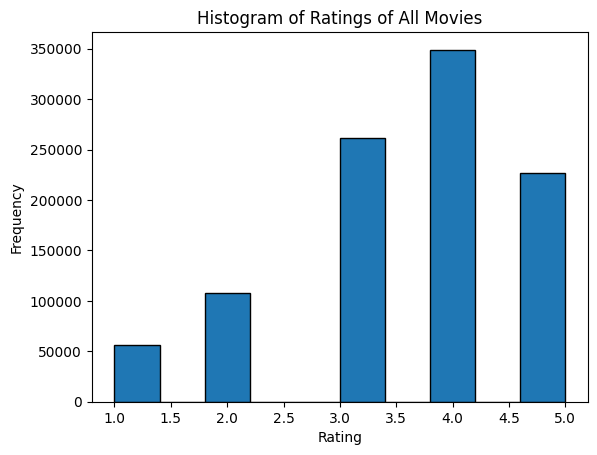

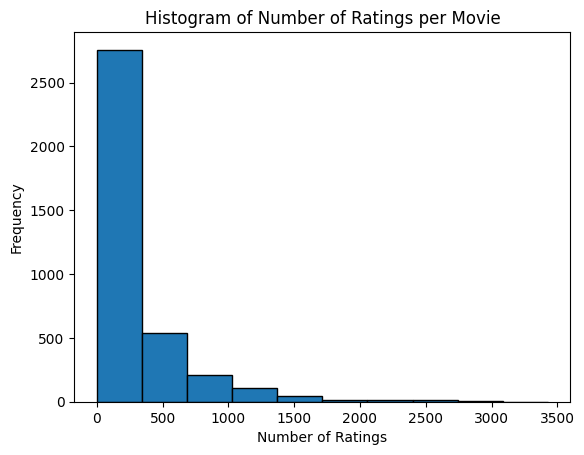

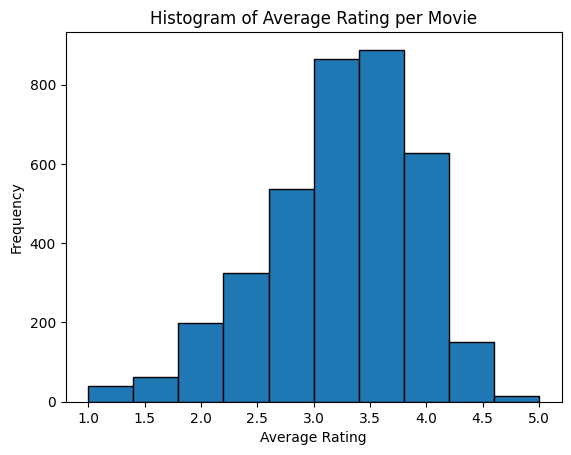

In [27]:
import matplotlib.pyplot as plt

# Histogram of the ratings of all movies
plt.hist(df['Rating'], bins=10, edgecolor='black')
plt.title('Histogram of Ratings of All Movies')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Histogram of the number of ratings each movie received
ratings_per_movie = df.groupby('MovieID').size()
plt.hist(ratings_per_movie, bins=10, edgecolor='black')
plt.title('Histogram of Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

# Histogram of the average rating for each movie
avg_rating_per_movie = df.groupby('MovieID')['Rating'].mean()
plt.hist(avg_rating_per_movie, bins=10, edgecolor='black')
plt.title('Histogram of Average Rating per Movie')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


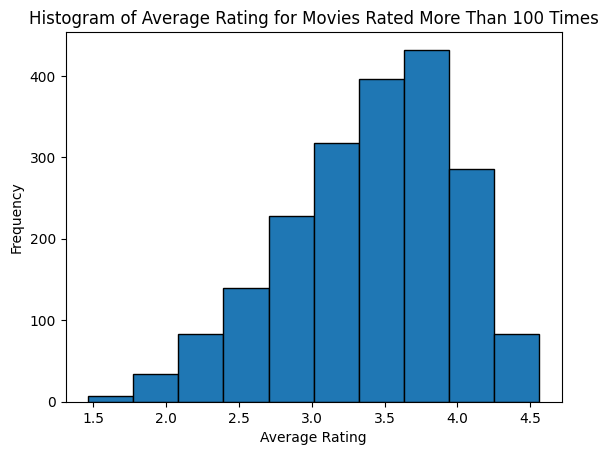

In [28]:
# Histogram of the average rating for movies rated more than 100 times
popular_movies = df.groupby('MovieID').filter(lambda x: len(x) > 100)
avg_rating_popular_movies = popular_movies.groupby('MovieID')['Rating'].mean()

plt.hist(avg_rating_popular_movies, bins=10, edgecolor='black')
plt.title('Histogram of Average Rating for Movies Rated More Than 100 Times')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


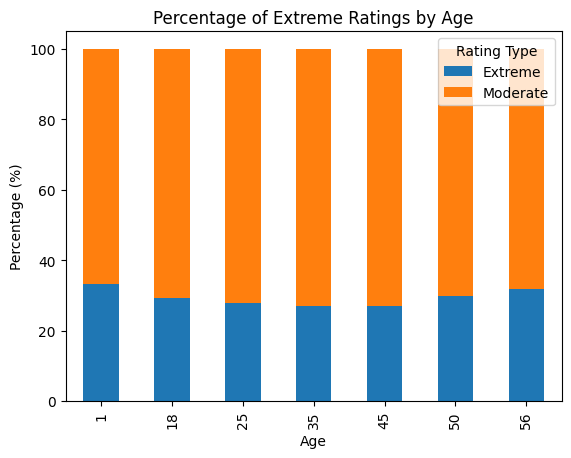

In [29]:
#Conjecture-1: what age range do you think has more extreme ratings? Do you think children are more or less likely to rate a movie 1 or 5?
extreme_ratings_by_age = df.copy()
extreme_ratings_by_age['ExtremeRating'] = extreme_ratings_by_age['Rating'].apply(lambda x: 'Extreme' if x == 1 or x == 5 else 'Moderate')
age_distribution_extreme = extreme_ratings_by_age.groupby(['Age', 'ExtremeRating']).size().unstack(fill_value=0)

# Calculate percentage of total within each age group
age_distribution_extreme_percentage = age_distribution_extreme.div(age_distribution_extreme.sum(axis=1), axis=0) * 100

age_distribution_extreme_percentage.plot(kind='bar', stacked=True)
plt.title('Percentage of Extreme Ratings by Age')
plt.xlabel('Age')
plt.ylabel('Percentage (%)')
plt.legend(title='Rating Type')
plt.show()
#Conjecture is false as no age group really stands out in this aspect compared to others but children and older people do give more extreme ratings comparatively.

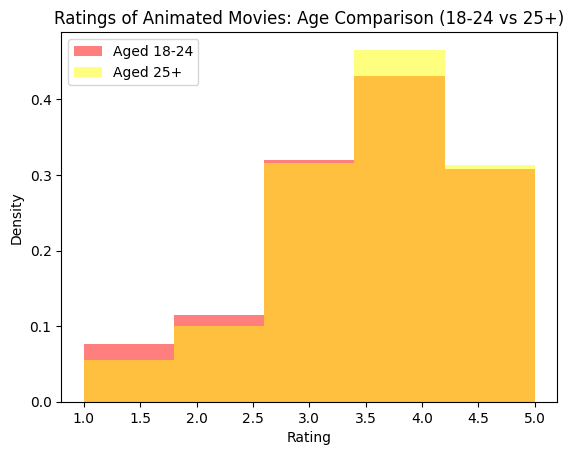

In [30]:
#Conjecture- Users aged 18-24 are more critical of Animated movies compared to older age groups
animated_movies = df[df['Genres'].str.contains('Animation')]
younger_users = animated_movies[animated_movies['Age'].between(18, 24)]
older_users = animated_movies[~animated_movies['Age'].between(18, 24)]

plt.hist(younger_users['Rating'], bins=5, alpha=0.5, label='Aged 18-24', color='red', density=True)
plt.hist(older_users['Rating'], bins=5, alpha=0.5, label='Aged 25+', color='yellow', density=True)
plt.title('Ratings of Animated Movies: Age Comparison (18-24 vs 25+)')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()
plt.show()

#Our conjecture is mostly true

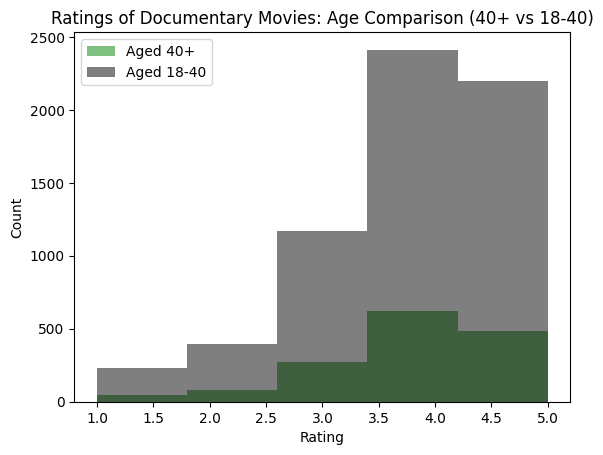

In [31]:
#Conjecture 2: Users over 40 give higher ratings to Documentaries compared to younger users.
documentaries = df[df['Genres'].str.contains('Documentary')]
older_users = documentaries[documentaries['Age'] > 40]
younger_users = documentaries[documentaries['Age'] <= 40]

plt.hist(older_users['Rating'], bins=5, alpha=0.5, label='Aged 40+', color='green')
plt.hist(younger_users['Rating'], bins=5, alpha=0.5, label='Aged 18-40', color='black')
plt.title('Ratings of Documentary Movies: Age Comparison (40+ vs 18-40)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend()
plt.show()
#Our conjecture is somewhat correct though the difference is less than expected.

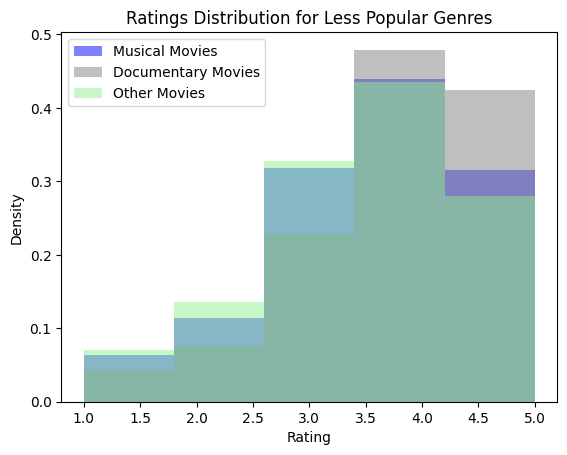

In [33]:
#Conjecture 3: Users with higher ratings are more likely to watch movies from less popular genres, such as Musical and Documentary.
musical_movies = df[df['Genres'].str.contains('Musical')]
documentary_movies = df[df['Genres'].str.contains('Documentary')]
other_movies = df[~df['Genres'].str.contains('Musical|Documentary')]

plt.hist(musical_movies['Rating'], bins=5, alpha=0.5, label='Musical Movies', color='blue', density=True)
plt.hist(documentary_movies['Rating'], bins=5, alpha=0.5, label='Documentary Movies', color='grey', density=True)
plt.hist(other_movies['Rating'], bins=5, alpha=0.5, label='Other Movies', color='lightgreen', density=True)
plt.title('Ratings Distribution for Less Popular Genres')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()
plt.show()
#while less popular genres receive decent ratings, there isn't significant evidence to conclude that users who rate highly are more likely to watch them compared to other genres.

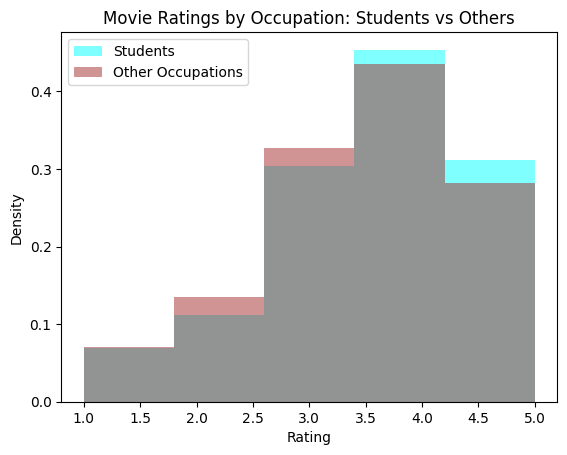

In [34]:
#Conjecture 5: Users in different occupations have varied preferences, showing that students rate movies significantly higher than other occupation groups.
students = df[df['Occupation'] == 6]
other_occupations = df[df['Occupation'] != 6]

plt.hist(students['Rating'], bins=5, alpha=0.5, label='Students', color='cyan', density=True)
plt.hist(other_occupations['Rating'], bins=5, alpha=0.5, label='Other Occupations', color='brown', density=True)
plt.title('Movie Ratings by Occupation: Students vs Others')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()
plt.show()
#Our conjecture is true

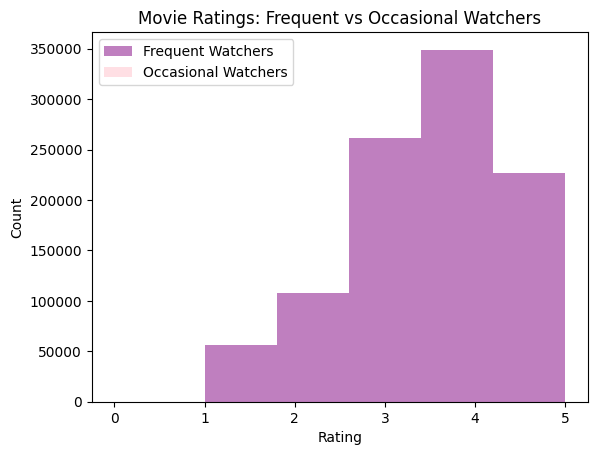

In [35]:
#Conjecture 6: Users who frequently watch movies (more than 10 ratings) provide higher ratings compared to those who watch occasionally
frequent_watchers = df[df['UserID'].map(df['UserID'].value_counts()) > 10]
occasional_watchers = df[df['UserID'].map(df['UserID'].value_counts()) <= 10]

plt.hist(frequent_watchers['Rating'], bins=5, alpha=0.5, label='Frequent Watchers', color='purple')
plt.hist(occasional_watchers['Rating'], bins=5, alpha=0.5, label='Occasional Watchers', color='pink')
plt.title('Movie Ratings: Frequent vs Occasional Watchers')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend()
plt.show()

#Our conjecture is false as there isnt much shift here between these two.

C:\Users\gmkal\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


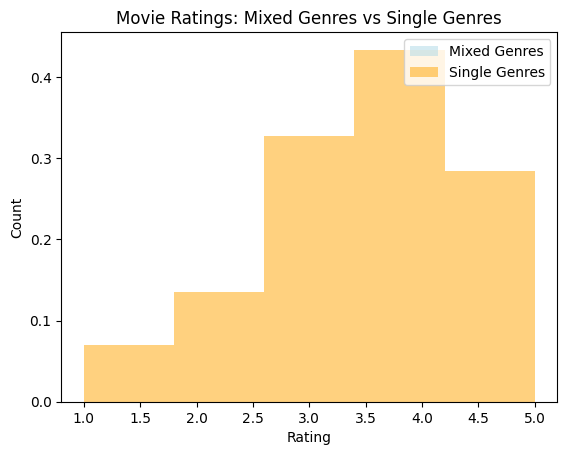

In [54]:
#Conjecture 7: Users with higher average ratings are more likely to watch movies with mixed genres compared to single-genre movies.
mixed_genres = df[df['Genres'].str.contains('Action|Comedy|Drama|Romance|Sci-Fi|Thriller|Horror|Animation')]
single_genres = df[~df['Genres'].str.contains('Action|Comedy|Drama|Romance|Sci-Fi|Thriller|Horror|Animation')]

plt.hist(mixed_genres['Rating'], bins=5, alpha=0.5, label='Mixed Genres', color='lightblue')
plt.hist(single_genres['Rating'], bins=5, alpha=0.5, label='Single Genres', color='orange'
plt.title('Movie Ratings: Mixed Genres vs Single Genres')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend()
plt.show()

#Our conjecture is false

*------------------------

# Problem 3: (20 points total)
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* (2 points) Make a scatter plot of men versus women and their mean rating for every movie.
* (2 points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* (6 points) Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* (10 points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

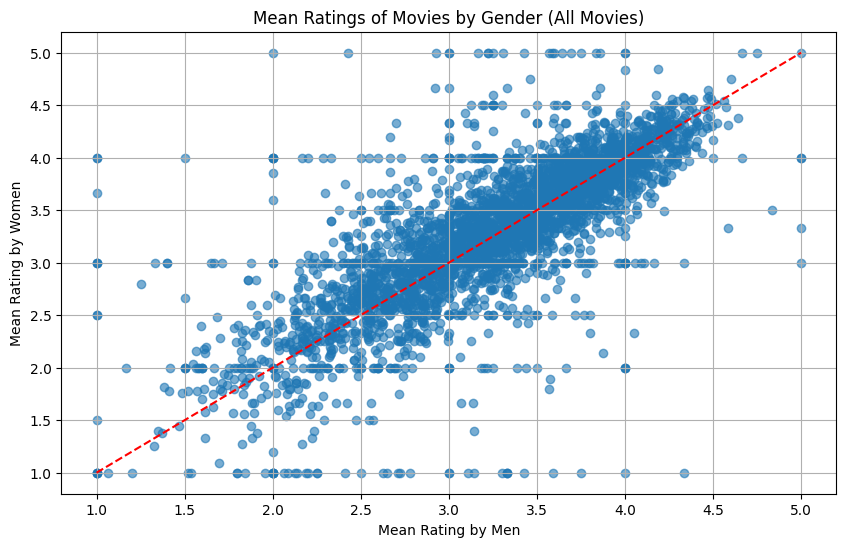

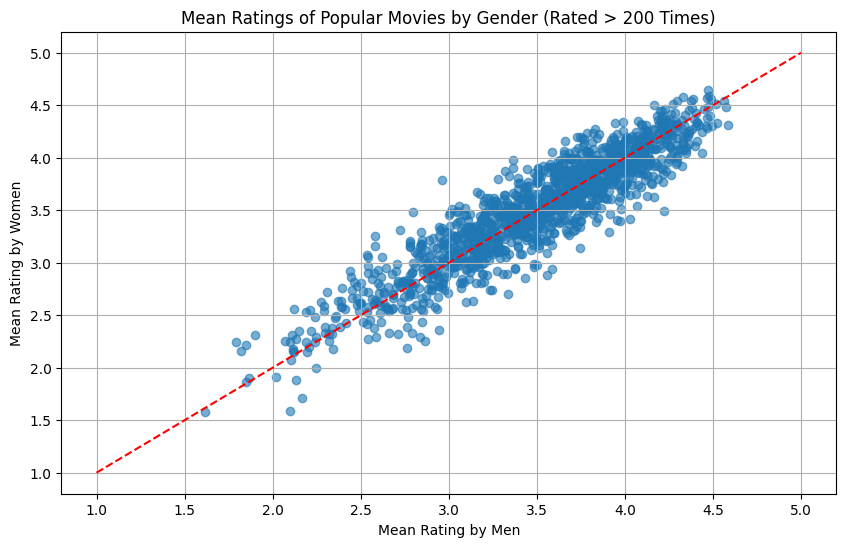

Correlation coefficient between ratings of men and women: 0.76


In [37]:

mean_ratings = df.groupby(['MovieID', 'Gender'])['Rating'].mean().unstack()

plt.figure(figsize=(10, 6))
plt.scatter(mean_ratings['M'], mean_ratings['F'], alpha=0.6)
plt.title('Mean Ratings of Movies by Gender (All Movies)')
plt.xlabel('Mean Rating by Men')
plt.ylabel('Mean Rating by Women')
plt.plot([1, 5], [1, 5], 'r--')
plt.grid()
plt.show()

popular_movies = df.groupby('MovieID').filter(lambda x: len(x) > 200)

mean_ratings_popular = popular_movies.groupby(['MovieID', 'Gender'])['Rating'].mean().unstack()

plt.figure(figsize=(10, 6))
plt.scatter(mean_ratings_popular['M'], mean_ratings_popular['F'], alpha=0.6)
plt.title('Mean Ratings of Popular Movies by Gender (Rated > 200 Times)')
plt.xlabel('Mean Rating by Men')
plt.ylabel('Mean Rating by Women')
plt.plot([1, 5], [1, 5], 'r--')
plt.grid()
plt.show()

correlation = mean_ratings['M'].corr(mean_ratings['F'])
print(f'Correlation coefficient between ratings of men and women: {correlation:.2f}')

#correlation coeff of 0.76 means there is a strong positive correlation between the ratings of men and women, which makes sense when we look at the graphs where we find most of the points around y=x line suggesting a nearly linear-proportional relationship


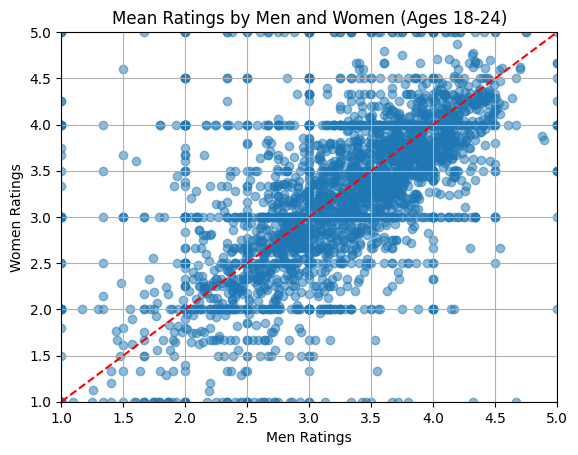

Correlation between men and women ratings (Ages 18-24): 0.58


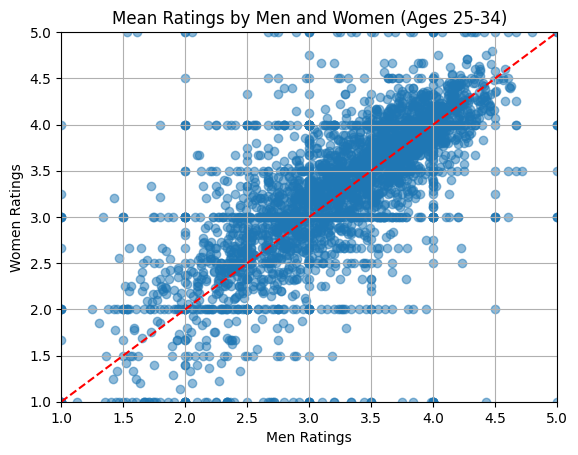

Correlation between men and women ratings (Ages 25-34): 0.69


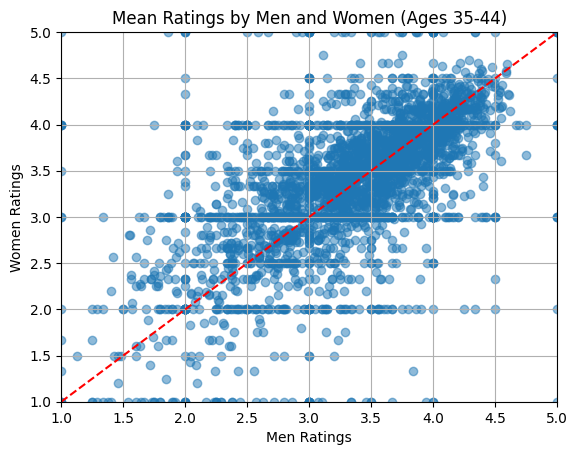

Correlation between men and women ratings (Ages 35-44): 0.60


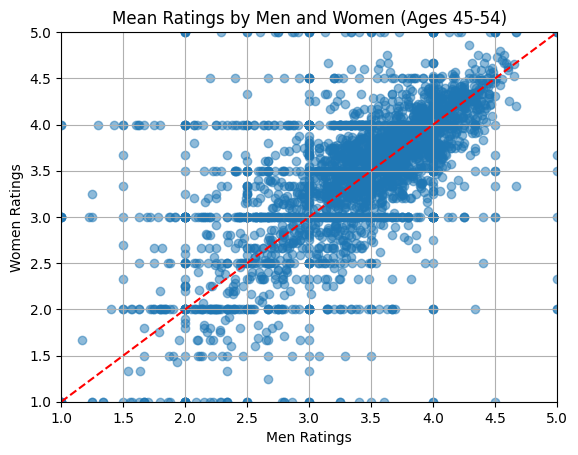

Correlation between men and women ratings (Ages 45-54): 0.62


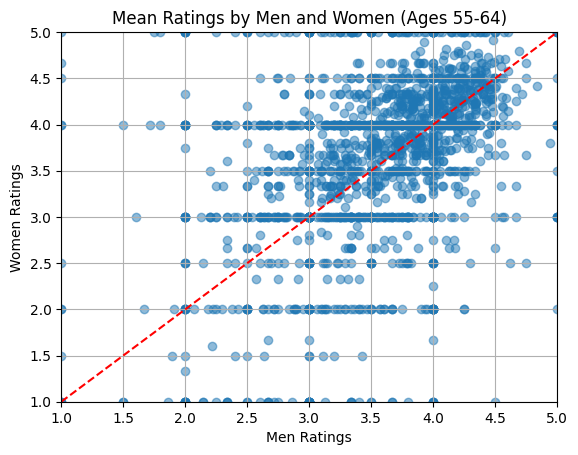

Correlation between men and women ratings (Ages 55-64): 0.41
Insufficient data for age group 65-100.


In [38]:
#Conjecture: under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
#For example, are men and women more similar when they are younger or older?
def mean_ratings_by_age_group(age_min, age_max):
    age_group = df[(df['Age'] >= age_min) & (df['Age'] <= age_max)]
    return age_group.groupby(['MovieID', 'Gender'])['Rating'].mean().unstack()

age_groups = [(18, 24), (25, 34), (35, 44), (45, 54), (55, 64), (65, 100)]

for age_min, age_max in age_groups:
    mean_ratings = mean_ratings_by_age_group(age_min, age_max)
    
    if 'M' in mean_ratings.columns and 'F' in mean_ratings.columns:
        plt.scatter(mean_ratings['M'], mean_ratings['F'], alpha=0.5)
        plt.title(f'Mean Ratings by Men and Women (Ages {age_min}-{age_max})')
        plt.xlabel('Men Ratings')
        plt.ylabel('Women Ratings')
        plt.xlim(1, 5)
        plt.ylim(1, 5)
        plt.axline((0, 0), slope=1, color='red', linestyle='--')
        plt.grid()
        plt.show()

        correlation = mean_ratings.corr().iloc[0, 1]
        print(f'Correlation between men and women ratings (Ages {age_min}-{age_max}): {correlation:.2f}')
    else:
        print(f'Insufficient data for age group {age_min}-{age_max}.')


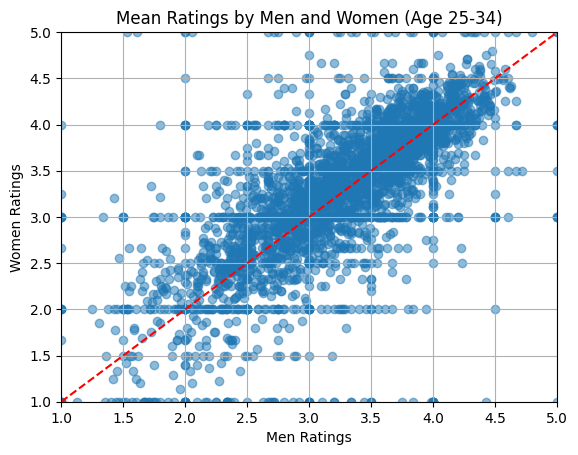

In [39]:
#Users aged 25-34 have similar ratings to both genders, suggesting this age group is less influenced by gender differences.
age_25_34 = df[(df['Age'] >= 25) & (df['Age'] <= 34)]
mean_ratings_age_25_34 = age_25_34.groupby(['MovieID', 'Gender'])['Rating'].mean().unstack()
plt.scatter(mean_ratings_age_25_34['M'], mean_ratings_age_25_34['F'], alpha=0.5)
plt.title('Mean Ratings by Men and Women (Age 25-34)')
plt.xlabel('Men Ratings')
plt.ylabel('Women Ratings')
plt.xlim(1, 5)
plt.ylim(1, 5)
plt.axline((0, 0), slope=1, color='red', linestyle='--')
plt.grid()
plt.show()
#they have a high correlation of 0.69 which is the highest of all age groups, our conjecture is true

Correlation between men and women ratings (Frequent Watchers): 0.76
Correlation between men and women ratings (Non-Frequent Watchers): 0.26


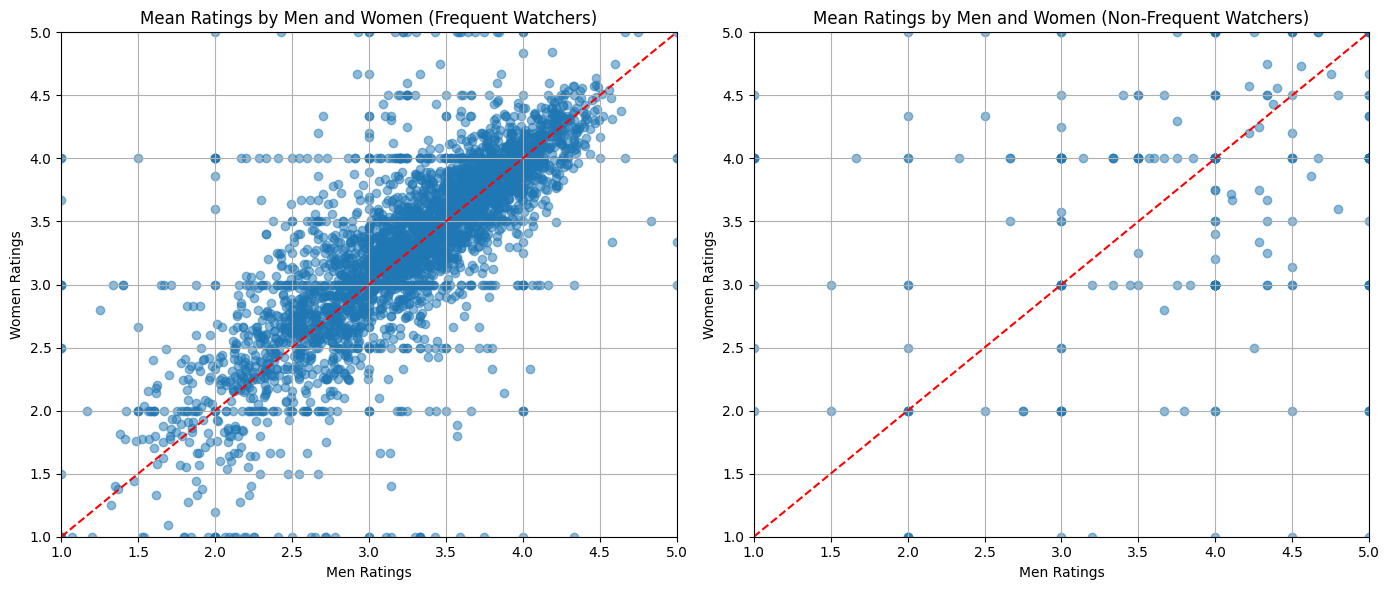

In [41]:
#Users with frequent movie-watching habits (more than 10 ratings) provide more consistent ratings between genders.

# Frequent watchers (more than 10 ratings)
frequent_watchers = df.groupby('UserID').filter(lambda x: len(x) > 20)
mean_ratings_frequent = frequent_watchers.groupby(['MovieID', 'Gender'])['Rating'].mean().unstack()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(mean_ratings_frequent['M'], mean_ratings_frequent['F'], alpha=0.5)
plt.title('Mean Ratings by Men and Women (Frequent Watchers)')
plt.xlabel('Men Ratings')
plt.ylabel('Women Ratings')
plt.xlim(1, 5)
plt.ylim(1, 5)
plt.axline((0, 0), slope=1, color='red', linestyle='--')
plt.grid()

# Correlation for frequent watchers
correlation_frequent = mean_ratings_frequent.corr().iloc[0, 1]
print(f'Correlation between men and women ratings (Frequent Watchers): {correlation_frequent:.2f}')

# Non-frequent watchers (10 or fewer ratings)
non_frequent_watchers = df.groupby('UserID').filter(lambda x: len(x) <= 20)
mean_ratings_non_frequent = non_frequent_watchers.groupby(['MovieID', 'Gender'])['Rating'].mean().unstack()

plt.subplot(1, 2, 2)
plt.scatter(mean_ratings_non_frequent['M'], mean_ratings_non_frequent['F'], alpha=0.5)
plt.title('Mean Ratings by Men and Women (Non-Frequent Watchers)')
plt.xlabel('Men Ratings')
plt.ylabel('Women Ratings')
plt.xlim(1, 5)
plt.ylim(1, 5)
plt.axline((0, 0), slope=1, color='red', linestyle='--')
plt.grid()

# Correlation for non-frequent watchers
correlation_non_frequent = mean_ratings_non_frequent.corr().iloc[0, 1]
print(f'Correlation between men and women ratings (Non-Frequent Watchers): {correlation_non_frequent:.2f}')

plt.tight_layout()
plt.show()

#Our conjecture is true

Correlation between men and women ratings (Action Movies): 0.84
Correlation between men and women ratings (Drama Movies): 0.64


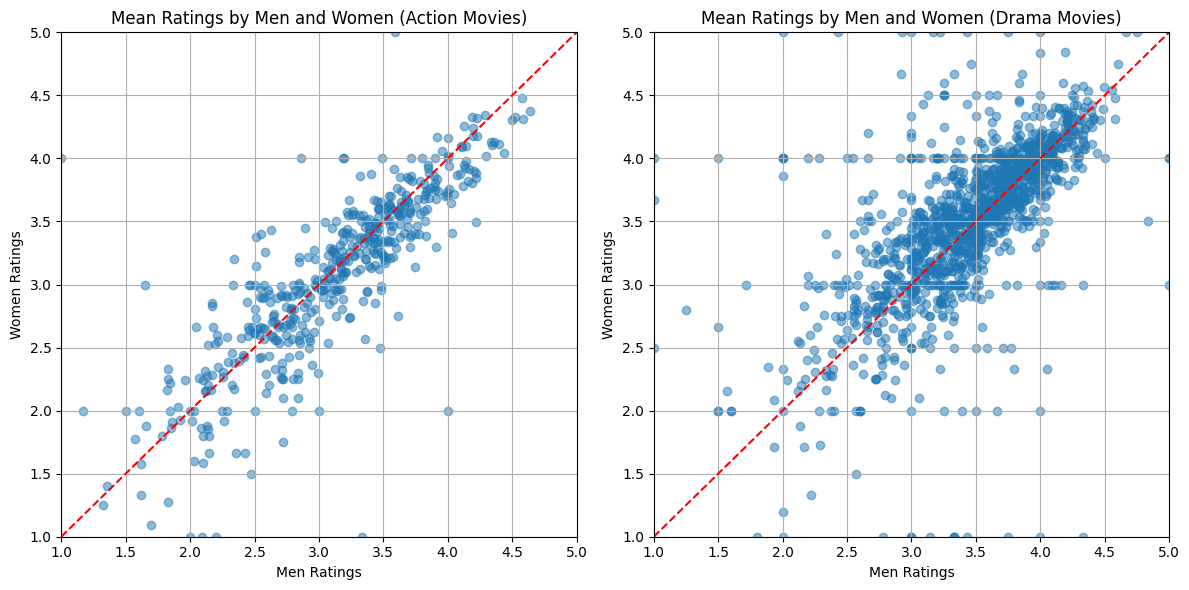

In [42]:
#Conjecture: Ratings for action movies show a stronger correlation between men and women than ratings for dramas.
# Ratings for Action Movies
action_users = df[df['Genres'].str.contains('Action', case=False, na=False)]
mean_ratings_action = action_users.groupby(['MovieID', 'Gender'])['Rating'].mean().unstack()

if 'M' in mean_ratings_action.columns and 'F' in mean_ratings_action.columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(mean_ratings_action['M'], mean_ratings_action['F'], alpha=0.5)
    plt.title('Mean Ratings by Men and Women (Action Movies)')
    plt.xlabel('Men Ratings')
    plt.ylabel('Women Ratings')
    plt.xlim(1, 5)
    plt.ylim(1, 5)
    plt.axline((0, 0), slope=1, color='red', linestyle='--')
    plt.grid()

    correlation_action = mean_ratings_action.corr().iloc[0, 1]
    print(f'Correlation between men and women ratings (Action Movies): {correlation_action:.2f}')
else:
    print("Insufficient data for action movies.")

# Ratings for Drama Movies
drama_users = df[df['Genres'].str.contains('Drama', case=False, na=False)]
mean_ratings_drama = drama_users.groupby(['MovieID', 'Gender'])['Rating'].mean().unstack()

if 'M' in mean_ratings_drama.columns and 'F' in mean_ratings_drama.columns:
    plt.subplot(1, 2, 2)
    plt.scatter(mean_ratings_drama['M'], mean_ratings_drama['F'], alpha=0.5)
    plt.title('Mean Ratings by Men and Women (Drama Movies)')
    plt.xlabel('Men Ratings')
    plt.ylabel('Women Ratings')
    plt.xlim(1, 5)
    plt.ylim(1, 5)
    plt.axline((0, 0), slope=1, color='red', linestyle='--')
    plt.grid()

    correlation_drama = mean_ratings_drama.corr().iloc[0, 1]
    print(f'Correlation between men and women ratings (Drama Movies): {correlation_drama:.2f}')
else:
    print("Insufficient data for drama movies.")

plt.tight_layout()
plt.show()

#Conjecture is True 

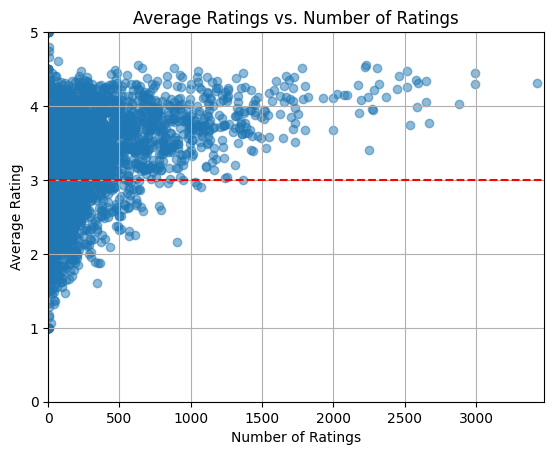

In [43]:
#Conjecture: Movies with higher ratings tend to have fewer ratings (indicating a preference for niche films).
ratings_count = df.groupby('MovieID').agg({'Rating': 'mean', 'UserID': 'count'}).reset_index()
ratings_count.columns = ['MovieID', 'AverageRating', 'NumberOfRatings']

plt.scatter(ratings_count['NumberOfRatings'], ratings_count['AverageRating'], alpha=0.5)
plt.title('Average Ratings vs. Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.xlim(0, ratings_count['NumberOfRatings'].max() + 50)
plt.ylim(0, 5)
plt.axhline(y=3, color='red', linestyle='--')  # Reference line at average rating of 3
plt.grid()
plt.show()
#Our conjecture is false but there are a few instances where it is true


In [52]:
#Making a pivot table to see the effect of gender, age, occupation and genre on rating.
#Anova test to validate our conjecture by seeing the significance of demographic.

!pip install statsmodels
occupation_map = {
    0: "Non-Technical",
    1: "Non-Technical",
    2: "Creative",
    3: "Administrative",
    4: "Student",
    5: "Services",
    6: "Technical",
    7: "Administrative",
    8: "Non-Technical",
    9: "Non-Technical",
    10: "Student",
    11: "Technical",
    12: "Technical",
    13: "Non-Technical",
    14: "Sales",
    15: "Technical",
    16: "Non-Technical",
    17: "Technical",
    18: "Technical",
    19: "Non-Technical",
    20: "Creative"
}


df['Occupation_Category'] = df['Occupation'].map(occupation_map)


df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 24, 34, 44, 55, 100],
                         labels=["Under 18", "18-24", "25-34", "35-44", "45-55", "55+"])


df['Genres'] = df['Genres'].str.split('|')
df = df.explode('Genres')


pivot_table = df.pivot_table(
    index=['Occupation_Category', 'Gender', 'Age_Group'],
    columns='Genres',
    values='Rating',
    aggfunc='mean'
).round(2)

# Quantifying the impact of demographic factors on ratings
import statsmodels.api as sm
from statsmodels.formula.api import ols

pivot_df = pivot_table.reset_index()
melted_df = pivot_df.melt(id_vars=['Occupation_Category', 'Gender', 'Age_Group'],
                           value_vars=pivot_table.columns,
                           var_name='Genre', value_name='Average_Rating')

model = ols('Average_Rating ~ C(Occupation_Category) + C(Gender) + C(Age_Group)', data=melted_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

pivot_table, anova_table
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)
print(pivot_table)



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\gmkal\AppData\Local\Temp\ipykernel_43324\855723362.py:38: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(


Genres                                action  adventure  animation  \
Occupation_Category Gender Age_Group                                 
Administrative      F      Under 18     3.68       3.68       3.85   
                           25-34        3.47       3.45       3.82   
                           35-44        3.65       3.68       3.83   
                           45-55        3.73       3.76       4.09   
                           55+          3.93       3.87       3.94   
                    M      Under 18     3.59       3.53       3.68   
                           25-34        3.50       3.42       3.67   
                           35-44        3.55       3.49       3.65   
                           45-55        3.63       3.62       3.83   
                           55+          3.93       3.76       3.69   
Creative            F      Under 18     2.94       2.96       3.39   
                           25-34        3.31       3.38       3.63   
                    

C:\Users\gmkal\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  warnings.warn('covariance of constraints does not have full '


In [55]:
# Map occupations to categories
occupation_map = {
    0: "Non-Technical",
    1: "Non-Technical",
    2: "Creative",
    3: "Administrative",
    4: "Student",
    5: "Services",
    6: "Technical",
    7: "Administrative",
    8: "Non-Technical",
    9: "Non-Technical",
    10: "Student",
    11: "Technical",
    12: "Technical",
    13: "Non-Technical",
    14: "Sales",
    15: "Technical",
    16: "Non-Technical",
    17: "Technical",
    18: "Technical",
    19: "Non-Technical",
    20: "Creative"
}

df['Occupation_Category'] = df['Occupation'].map(occupation_map)
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 24, 34, 44, 55, 100],
                         labels=["Under 18", "18-24", "25-34", "35-44", "45-55", "55+"])

pivot_table = df.pivot_table(
    index=['Occupation_Category', 'Gender', 'Age_Group'],
    values='Rating',
    aggfunc='mean'
).round(2)

# Display the pivot table
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)
print(pivot_table)


C:\Users\gmkal\AppData\Local\Temp\ipykernel_43324\2368571309.py:30: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(


                                      Rating
Occupation_Category Gender Age_Group        
Administrative      F      Under 18     3.81
                           25-34        3.59
                           35-44        3.73
                           45-55        3.81
                           55+          4.00
                    M      Under 18     3.58
                           25-34        3.54
                           35-44        3.59
                           45-55        3.70
                           55+          3.86
Creative            F      Under 18     3.15
                           25-34        3.45
                           35-44        3.66
                           45-55        3.77
                           55+          4.13
                    M      Under 18     3.50
                           25-34        3.49
                           35-44        3.55
                           45-55        3.64
                           55+          3.89
Non-Techni

# Problem 4: (10 points total)
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer. 
* Suppose you are a Data Scientist at a movie company.  **Convince your boss that your conjecture is correct!**

####  \~\~ write here \~\~
**Revised Analysis and Justification:**

**Business Question:** What demographic factors—age, gender, occupation—most significantly influence viewer preferences for specific genres, and how can this information inform targeted marketing campaigns and content acquisition strategies?

**Relevant Conjectures Supporting the Business Question:**
- Men under 24 prefer Film-Noir, War, and Documentary genres.
- Men over 34 also favor War, Film-Noir, and Documentary genres.
- Comedy movies receive higher ratings from older users.
- Users aged 18-24 rate Horror movies lower than other genres.
- Older users (35+) give higher ratings to Drama and Thriller movies.
- Women over 40 prefer and rate Romantic Dramas highly.
- Although our initial hypothesis on occupation's influence was inconclusive, further analysis of ratings by pationed can reveal valuable insights for targete(pivot table)d campaigns.

**Core Insight: Age and Occupation Matter More ThBy analysing the data from these and other conjectures, our final conjecture is  conjecture is that *age and occupation are more significant determinants of movie ratings than gender.* This conclusion is supported by our findings, which show that while gender differences exist, they are less impactful than age  This can be observed by looking at our conjectures focused on these three things and the cases where our conjectures were true or false wrt to these three. We can take a look at the pivot table above on how occupation, gender and age effects genre and see that on an average, gender has the least impact overall.and occupation. For example, the correlation coefficient between male and female ratings is 0.76, indicating a strong positive correlation and suggesting that men and women generally hold similar opinions on movies. To reinforce this, we conducted an ANOVA test to determine the relative significance of each factor.

**Effect Sizes (Eta-Squared) for Each Factor:**
- **Occupation Category:** 2.38%
- **Gender:** 0.15%
- **Age Group:** 4.36%

These values highlight that *age group has the most significant effect on movie ratings,* followed closely by occupation, while gender has a minimal impact by comparison. In particular, the p-value for age and occupation is notably low (typically below 0.05), indicating that the observed differences in ratings by these factors are statistically significant and unlikely due to random chance.

In summary, our conjecture is well-supported: age and occupation significantly shape movie preferences, while gender plays a comparatively minor role. This insight can be instrumental for a movie company in tailoring content strategies. For instance, understanding that men under 24 prefer more intense genres like Film-Noir and War, while women over 40 favor Romantic Dra
mas, allows for focused marketing. Similarly, the varied preferences across occupations can guide targeted content recommendations. By leveraging these findings, we can make data-informed decisions for marketing, content acquisition, and personalized recommendations that align closely with audience demographics.tent acquisition to meet market demand.




# Report: communicate the results (15 points) 

Open ended. Should at least dicuss the following:

* What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer? Why?
    * The story of the group: How did each member help the group? This section should appear at the end and can essentially tell a story of how the case study started, the issues faced, how each member played a role and helped solve specific problems. ETC. ETC.
    
**Note**: Please include figures or tables in the report (**but no source code**). Should be minimum 8 pages.

# Slides (for 10 minutes of presentation) (15 points)


1. (3 points) Motivation about the data collection, why the topic is interesting to you. 

2. (8 points) Communicating Results (figure/table)

3. (4 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)'

**Note**: Three teams will be randomly chosen to present in the class.

# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "groupname.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.

* **PPT Slides**

* **Report**

Put the Jupyter Notebook file, the report (in PDF) and PPT slides (converted to PDF) in a folder. Zip the folder. After zipping, it should have the extension .zip. The name of the .zip file should be casestudy_3_groupname.zip. Upload the .zip file on Canvas.
        
**Note: Each team just needs to make one submission**